In [7]:
import pandas as pd
import numpy as np
from ast import literal_eval
import ast
import re
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [8]:
df = pd.read_csv('./datasets/movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [9]:
df[df['production_countries'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.production_countries.sample(30)

34379    [{'iso_3166_1': 'US', 'name': 'United States o...
44090    [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...
11191    [{'iso_3166_1': 'US', 'name': 'United States o...
41236    [{'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso...
39986              [{'iso_3166_1': 'JP', 'name': 'Japan'}]
23973    [{'iso_3166_1': 'US', 'name': 'United States o...
43087              [{'iso_3166_1': 'ES', 'name': 'Spain'}]
30289     [{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]
4592     [{'iso_3166_1': 'US', 'name': 'United States o...
20416    [{'iso_3166_1': 'US', 'name': 'United States o...
38371    [{'iso_3166_1': 'US', 'name': 'United States o...
44185    [{'iso_3166_1': 'US', 'name': 'United States o...
14021                                                   []
18715    [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...
31505                                                   []
5952     [{'iso_3166_1': 'US', 'name': 'United States o...
24284    [{'iso_3166_1': 'US', 'name': 'United States o.

In [11]:
df.spoken_languages.sample(30)

43478              [{'iso_639_1': 'tr', 'name': 'Türkçe'}]
34668             [{'iso_639_1': 'en', 'name': 'English'}]
28333             [{'iso_639_1': 'en', 'name': 'English'}]
17373             [{'iso_639_1': 'en', 'name': 'English'}]
19513             [{'iso_639_1': 'en', 'name': 'English'}]
22272                 [{'iso_639_1': 'ja', 'name': '日本語'}]
31135             [{'iso_639_1': 'en', 'name': 'English'}]
45009    [{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...
2605     [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
40787             [{'iso_639_1': 'en', 'name': 'English'}]
9787              [{'iso_639_1': 'es', 'name': 'Español'}]
8929              [{'iso_639_1': 'en', 'name': 'English'}]
17096                                                   []
22360             [{'iso_639_1': 'en', 'name': 'English'}]
38195    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
19916             [{'iso_639_1': 'en', 'name': 'English'}]
15793             [{'iso_639_1': 'en', 'name': 'English'

In [12]:
# checking for distorted records
new_df = df[~df["adult"].str.contains('False') & ~df["adult"].str.contains('True')]
new_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Using Apply to search for substring in all dataframe columns
substring = '/uUi23HjvDFYGfuVlCBGozUY1Ab4.jpg'
df[df.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
126,False,NaN,0,[],NaN,290157,tt0110217,en,Jupiter's Wife,"Michel Negroponte, a documentary filmmaker, me...",...,1995-01-01,0.0,87.0,[],Released,A Haunting Real Life Mystery,Jupiter's Wife,False,0.0,0.0


In [14]:
substring = '/uUi23HjvDFYGfuVlCBGozUY1Ab4.jpg'
df[df.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
126,False,NaN,0,[],NaN,290157,tt0110217,en,Jupiter's Wife,"Michel Negroponte, a documentary filmmaker, me...",...,1995-01-01,0.0,87.0,[],Released,A Haunting Real Life Mystery,Jupiter's Wife,False,0.0,0.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [16]:
# select the variables/columns to explore and store in df_movies dataframe
target_columns = [
    'original_title', 'overview', 'revenue', 'budget', 'genres', 'original_language', 'popularity', 
    'vote_average', 'vote_count', 'production_countries']

df_movies = df[target_columns]

In [17]:
df_movies[df_movies['original_title'] == 'Big Hero 6']

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries
24455,Big Hero 6,The special bond that develops between plus-si...,652105443.0,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",en,213.849907,7.8,6289.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        45466 non-null  object 
 1   overview              44512 non-null  object 
 2   revenue               45460 non-null  float64
 3   budget                45466 non-null  object 
 4   genres                45466 non-null  object 
 5   original_language     45455 non-null  object 
 6   popularity            45461 non-null  object 
 7   vote_average          45460 non-null  float64
 8   vote_count            45460 non-null  float64
 9   production_countries  45463 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


In [19]:
df_movies.sample(20)

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries
19875,Raw Deal: A Question Of Consent,A documentary about the circumstances during a...,0.0,0,"[{'id': 99, 'name': 'Documentary'}]",en,0.018283,0.0,0.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
35340,Jimi Plays Monterey,It's no exaggeration to say this might be the ...,0.0,0,"[{'id': 10402, 'name': 'Music'}]",en,1.087264,6.7,7.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4418,Spoorloos,A young man begins an obsessive search for his...,0.0,0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",nl,11.096035,7.4,124.0,"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}, ..."
33589,Junun,Paul Thomas Anderson joined his close friend a...,0.0,0,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n...",en,1.609769,7.9,19.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
15831,Tumbledown,The film centres on the experiences of Robert ...,0.0,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",en,0.7355,5.2,3.0,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]"
29878,The American Scream,An original documentary which follows three fa...,0.0,0,"[{'id': 99, 'name': 'Documentary'}]",en,1.129757,7.1,8.0,[]
20338,After Porn Ends,Documentary examining what happens to some of ...,0.0,400000,"[{'id': 99, 'name': 'Documentary'}]",en,4.611972,5.5,65.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
33056,08/15,No overview found.,0.0,0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",de,0.628127,5.9,4.0,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]"
39967,Un poison violent,"Anna, a young teenager, comes home from her Ca...",0.0,2000000,"[{'id': 18, 'name': 'Drama'}]",fr,0.23091,6.3,5.0,"[{'iso_3166_1': 'FR', 'name': 'France'}]"
12046,Gotti,"John Gotti, the head of a small New York mafia...",0.0,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",en,1.189465,5.1,12.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [20]:
df_movies['vote_average'].value_counts()

vote_average
0.0    2998
6.0    2468
5.0    2001
7.0    1886
6.5    1722
       ... 
9.4       3
9.6       1
9.8       1
0.7       1
1.1       1
Name: count, Length: 92, dtype: int64

In [21]:
df_movies['vote_count'].value_counts()

vote_count
1.0       3264
2.0       3132
0.0       2899
3.0       2787
4.0       2480
          ... 
1721.0       1
1059.0       1
448.0        1
2020.0       1
2169.0       1
Name: count, Length: 1820, dtype: int64

In [22]:
df['popularity'].value_counts()

popularity
0.0         66
1e-06       56
0.000308    43
0.00022     40
0.000578    38
            ..
6.173752     1
0.645652     1
0.556292     1
0.914133     1
0.261949     1
Name: count, Length: 43758, dtype: int64

In [23]:
df['popularity'].describe()

count     45461
unique    43758
top         0.0
freq         66
Name: popularity, dtype: object

In [24]:
df_movies['production_countries'].value_counts()

production_countries
[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                    17851
[]                                                                                                                                             6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                               2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                       1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                        1356
                                                                                                                                              ...  
[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {

In [25]:
df_movies['genres'].value_counts()

genres
[{'id': 18, 'name': 'Drama'}]                                                                                                                                            5000
[{'id': 35, 'name': 'Comedy'}]                                                                                                                                           3621
[{'id': 99, 'name': 'Documentary'}]                                                                                                                                      2723
[]                                                                                                                                                                       2442
[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]                                                                                                          1301
                                                                                                                           

In [26]:
df_movies['original_language'].value_counts()

original_language
en      32269
fr       2438
it       1529
ja       1350
de       1080
        ...  
sm          1
82.0        1
hy          1
lb          1
si          1
Name: count, Length: 92, dtype: int64

Compute IMDb score using IMDB's weighted rating formula, store in a new column imdb_score

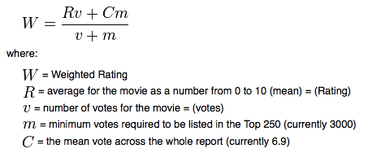
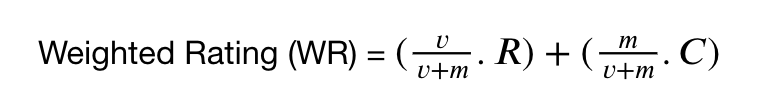

In [27]:
C = df_movies['vote_average'].mean()
m = df_movies['vote_count'].quantile(0.9)

q_movies = df_movies.copy().loc[df_movies['vote_count'] >= m]

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    #computation based on IMDB formula
    return (v/(v+m) * R) + (m/(v+m) * C)

print('The mean vote across the whole dataset - ', C)
print('The minimum votes required to be listed in the top 250 - ', m)

The mean vote across the whole dataset -  5.618207215134184
The minimum votes required to be listed in the top 250 -  160.0


In [28]:
# define a new feature imdb_score, calculate values using weighted_rating required to be considered
q_movies['imdb_score'] = q_movies.apply(weighted_rating, axis=1)
q_movies.head()

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries,imdb_score
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",373554033.0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,7.7,5415.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.640253
1,Jumanji,When siblings Judy and Peter discover an encha...,262797249.0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,6.9,2413.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",6.820293
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,76578911.0,0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,5.7,173.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",5.660700
5,Heat,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,17.924927,7.7,1886.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",7.537201
8,Sudden Death,International action superstar Jean Claude Van...,64350171.0,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,5.23158,5.5,174.0,"[{'iso_3166_1': 'US', 'name': 'United States o...",5.556626


In [29]:
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4555 entries, 0 to 45343
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4555 non-null   object 
 1   overview              4550 non-null   object 
 2   revenue               4555 non-null   float64
 3   budget                4555 non-null   object 
 4   genres                4555 non-null   object 
 5   original_language     4555 non-null   object 
 6   popularity            4555 non-null   object 
 7   vote_average          4555 non-null   float64
 8   vote_count            4555 non-null   float64
 9   production_countries  4555 non-null   object 
 10  imdb_score            4555 non-null   float64
dtypes: float64(4), object(7)
memory usage: 427.0+ KB


q_movies['popularity'] = pd.to_numeric(q_movies['popularity'],errors = 'coerce')
q_movies.info()

In [30]:
q_movies['popularity'] = q_movies['popularity'].astype(float)

q_movies['budget'] = pd.to_numeric(q_movies['budget'],errors = 'coerce')
q_movies.info()

In [31]:
q_movies['budget'] = q_movies['budget'].astype(float)

In [32]:
q_movies['overview'].isna().value_counts()

overview
False    4550
True        5
Name: count, dtype: int64

In [33]:
# create function to extract genre and country by converting from json list into list of strings

def json_to_arr(cell, wanted = 'name'):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [34]:
q_movies[['genres']] = df[['genres']].applymap(json_to_arr)
q_movies[['production_countries']] = q_movies[['production_countries']].applymap(lambda row:
                                                                                json_to_arr(row, "iso_3166_1"))

/tmp/ipykernel_32834/157653354.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_movies[['genres']] = df[['genres']].applymap(json_to_arr)
/tmp/ipykernel_32834/157653354.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  q_movies[['production_countries']] = q_movies[['production_countries']].applymap(lambda row:


In [35]:
q_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4555 entries, 0 to 45343
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        4555 non-null   object 
 1   overview              4550 non-null   object 
 2   revenue               4555 non-null   float64
 3   budget                4555 non-null   float64
 4   genres                4554 non-null   object 
 5   original_language     4555 non-null   object 
 6   popularity            4555 non-null   float64
 7   vote_average          4555 non-null   float64
 8   vote_count            4555 non-null   float64
 9   production_countries  4551 non-null   object 
 10  imdb_score            4555 non-null   float64
dtypes: float64(6), object(5)
memory usage: 427.0+ KB


In [36]:
q_movies.head()

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries,imdb_score
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",373554033.0,30000000.0,"[Animation, Comedy, Family]",en,21.946943,7.7,5415.0,[US],7.640253
1,Jumanji,When siblings Judy and Peter discover an encha...,262797249.0,65000000.0,"[Adventure, Fantasy, Family]",en,17.015539,6.9,2413.0,[US],6.820293
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,76578911.0,0.0,[Comedy],en,8.387519,5.7,173.0,[US],5.660700
5,Heat,"Obsessive master thief, Neil McCauley leads a ...",187436818.0,60000000.0,"[Action, Crime, Drama]",en,17.924927,7.7,1886.0,[US],7.537201
8,Sudden Death,International action superstar Jean Claude Van...,64350171.0,35000000.0,"[Action, Adventure, Thriller]",en,5.231580,5.5,174.0,[US],5.556626


df_1_clean.loc[df_1_clean['tweet_id'] == '682962037429899265', 'rating_numerator'] = 10

In [37]:
q_movies.loc[q_movies['original_language'] == 'da', 'original_language'] = 'Danish'
q_movies.loc[q_movies['original_language'] == 'de', 'original_language'] = 'German'
q_movies.loc[q_movies['original_language'] == 'en', 'original_language'] = 'English'
q_movies.loc[q_movies['original_language'] == 'es', 'original_language'] = 'Spanish'
q_movies.loc[q_movies['original_language'] == 'fr', 'original_language'] = 'French'
q_movies.loc[q_movies['original_language'] == 'hi', 'original_language'] = 'Hindi'
q_movies.loc[q_movies['original_language'] == 'it', 'original_language'] = 'Italian'
q_movies.loc[q_movies['original_language'] == 'ja', 'original_language'] = 'Japanese'
q_movies.loc[q_movies['original_language'] == 'ko', 'original_language'] = 'Korean'
q_movies.loc[q_movies['original_language'] == 'pt', 'original_language'] = 'Portuguese'
q_movies.loc[q_movies['original_language'] == 'sv', 'original_language'] = 'Svenska'

In [38]:
q_movies['original_language'].value_counts()

original_language
English       4077
French         177
Japanese        65
Italian         56
Spanish         38
German          27
Korean          19
cn              18
Danish          14
zh              11
Svenska         11
ru               8
Hindi            7
Portuguese       6
th               3
id               3
no               3
sr               2
nl               2
he               1
el               1
nb               1
fa               1
pl               1
tr               1
hu               1
te               1
Name: count, dtype: int64

#convert genres from json list into list of strings
q_movies['genres'] = q_movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

#define function to extract genres from json lists using regex
all_genres = []
def prune_genre(data):
    genre = []
    pattern = 'name\': \'[a-zA-Z]+\''
    found = re.findall(pattern, data)
    if found:
        for i in range(len(found)):
            genre.append(found[i][8:-1])
            if found[i][8:-1] not in all_genres:
                all_genres.append(found[i][8:-1])
    else:
        return []
    return genre

q_movies['genre'] = q_movies['genres'].apply(prune_genre)

In [39]:
q_movies = q_movies.sort_values('imdb_score', ascending=False)
q_movies.head(20)

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries,imdb_score
314,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,2.834147e+07,25000000.0,"[Drama, Crime]",English,51.645403,8.5,8358.0,[US],8.445869
834,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",2.450664e+08,6000000.0,"[Drama, Crime]",English,41.109264,8.5,6024.0,[US],8.425439
10309,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1.000000e+08,13200000.0,"[Comedy, Drama, Romance]",Hindi,34.457024,9.1,661.0,[IN],8.421453
12481,The Dark Knight,Batman raises the stakes in his war on crime. ...,1.004558e+09,185000000.0,"[Drama, Action, Crime]",English,123.167259,8.3,12269.0,"[GB, US]",8.265477
2843,Fight Club,A ticking-time-bomb insomniac and a slippery s...,1.008538e+08,63000000.0,[Drama],English,63.869599,8.3,9678.0,"[DE, US]",8.256385
292,Pulp Fiction,"A burger-loving hit man, his philosophical par...",2.139288e+08,8000000.0,"[Thriller, Crime]",English,140.950236,8.3,8670.0,[US],8.251406
522,Schindler's List,The true story of how businessman Oskar Schind...,3.213656e+08,22000000.0,"[Drama, History, War]",English,41.725123,8.3,4436.0,[US],8.206639
23673,Whiplash,"Under the direction of a ruthless instructor, ...",1.309200e+07,3300000.0,[Drama],English,64.299990,8.3,4376.0,[US],8.205404
5481,千と千尋の神隠し,A ten year old girl who wanders away from her ...,2.749251e+08,15000000.0,"[Fantasy, Adventure, Animation]",Japanese,41.048867,8.3,3968.0,[JP],8.196055
2211,La vita è bella,A touching story of an Italian book seller of ...,2.294000e+08,20000000.0,"[Comedy, Drama]",Italian,39.394970,8.3,3643.0,[IT],8.187171


In [40]:
top250movies_score = q_movies[['original_title', 'genres', 
                               'popularity', 'original_language', 'production_countries', 'imdb_score']].head(250)

In [41]:
top250movies_score.to_csv('top_movies_score.csv', index = False)

In [42]:
top250movies_score.describe()

,popularity,imdb_score
count,250.000000,250.000000
mean,21.847606,7.680821
std,23.954822,0.242204
min,0.010902,7.376555
25%,12.136232,7.481305
50%,15.812775,7.613630
75%,21.719981,7.825773
max,213.849907,8.445869


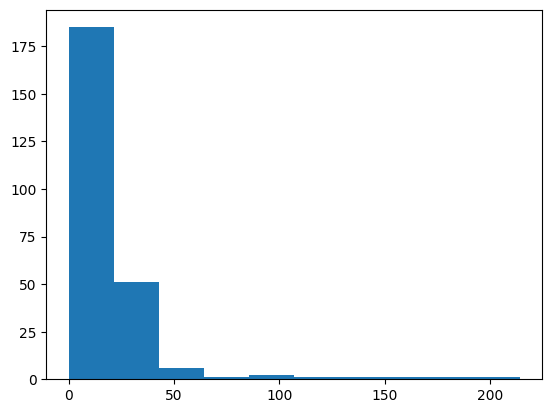

In [43]:
plt.hist(data=top250movies_score, x = 'popularity');

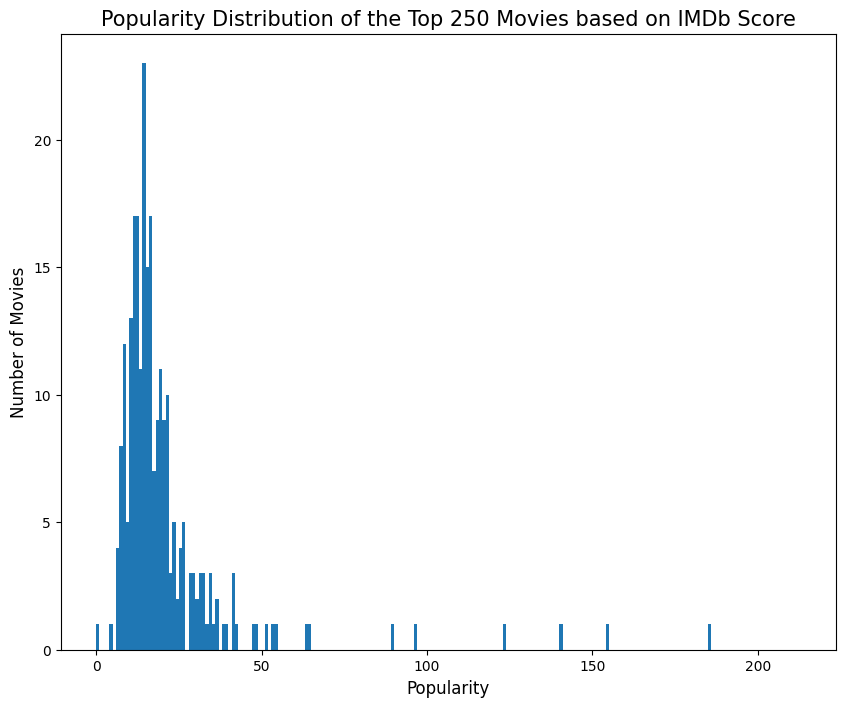

In [44]:
bins = np.arange(0, top250movies_score['popularity'].max()+0.01, 1)
plt.figure(figsize=[10, 8])
plt.hist(data=top250movies_score, x = 'popularity', bins = bins);
plt.xlabel('Popularity', size = 12);
plt.ylabel('Number of Movies', size = 12)
plt.title('Popularity Distribution of the Top 250 Movies based on IMDb Score', size = 15);

top250movies_score.loc[top250movies_score['production_countries'] == '682962037429899265', 'rating_numerator'] = 10

In [45]:
top250movies_score['genres'].value_counts()[:10]

genres
[Drama]                        21
[Drama, Crime]                  9
[Drama, Romance]                9
[Comedy, Drama]                 6
[Comedy, Drama, Romance]        6
[Drama, War]                    5
[Drama, History, War]           4
[Drama, History]                4
[Animation, Comedy, Family]     4
[Crime, Drama, Mystery]         4
Name: count, dtype: int64

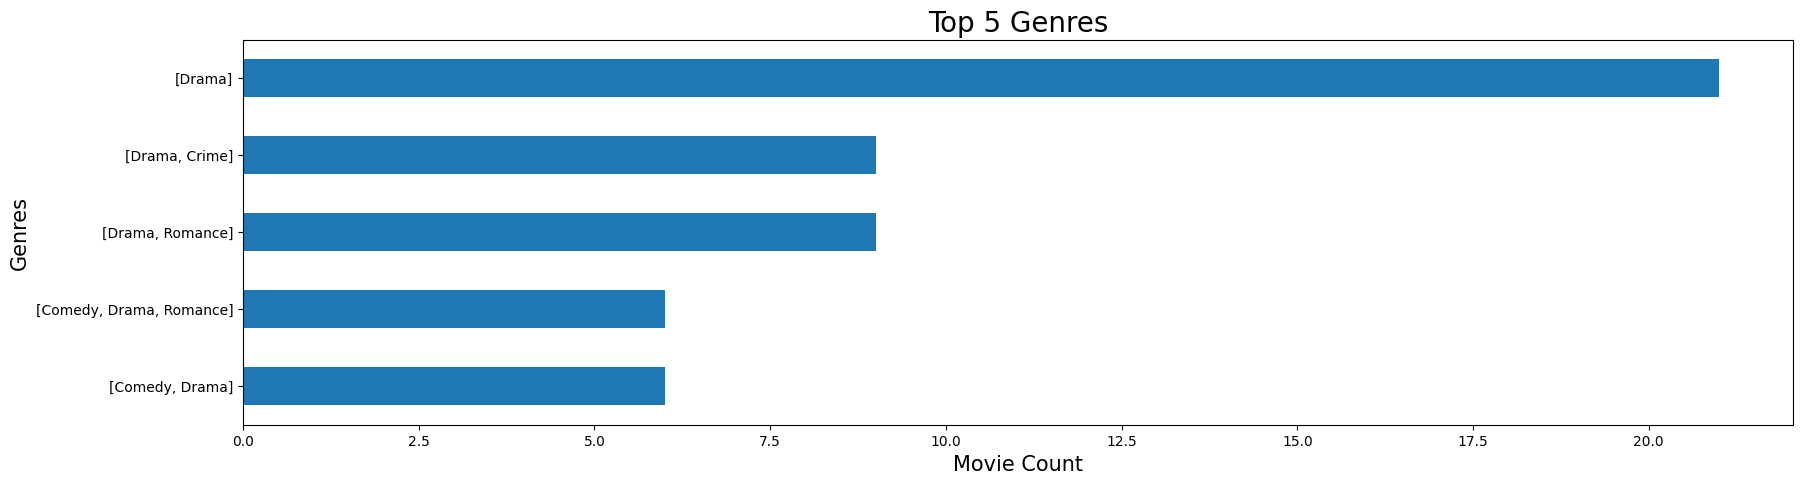

In [46]:
top250movies_score['genres'].value_counts()[:5].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 5 Genres', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Genres', fontsize = 15);

In [47]:
top250movies_score['popularity'].value_counts()

popularity
51.645403     1
41.109264     1
34.457024     1
123.167259    1
63.869599     1
             ..
13.906980     1
9.339316      1
8.764888      1
7.853231      1
89.887648     1
Name: count, Length: 250, dtype: int64

In [48]:
top250movies_score.sort_values('popularity', ascending=False, inplace=True)
top10_popularity = top250movies_score.head(5)

/tmp/ipykernel_32834/792964719.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sb.barplot(data = top10_popularity, x = 'popularity', y = 'original_title', color=base_color, errwidth = 0)


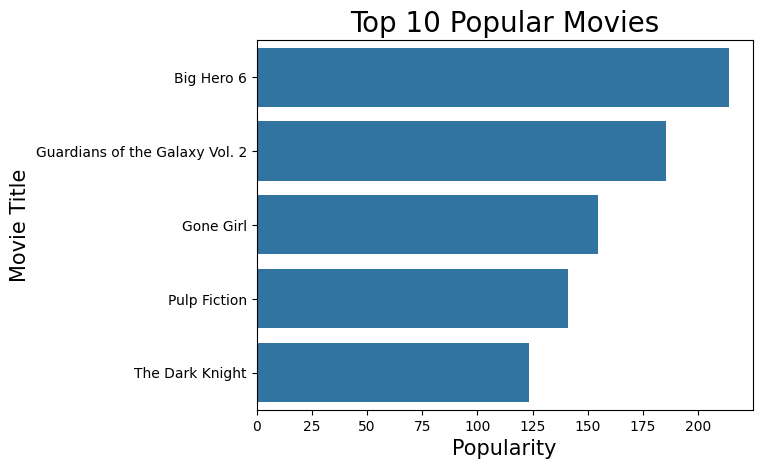

In [49]:
base_color = sb.color_palette()[0]
sb.barplot(data = top10_popularity, x = 'popularity', y = 'original_title', color=base_color, errwidth = 0)
plt.title('Top 10 Popular Movies', fontsize = 20)
plt.xlabel('Popularity', fontsize = 15);
plt.ylabel('Movie Title', fontsize = 15);

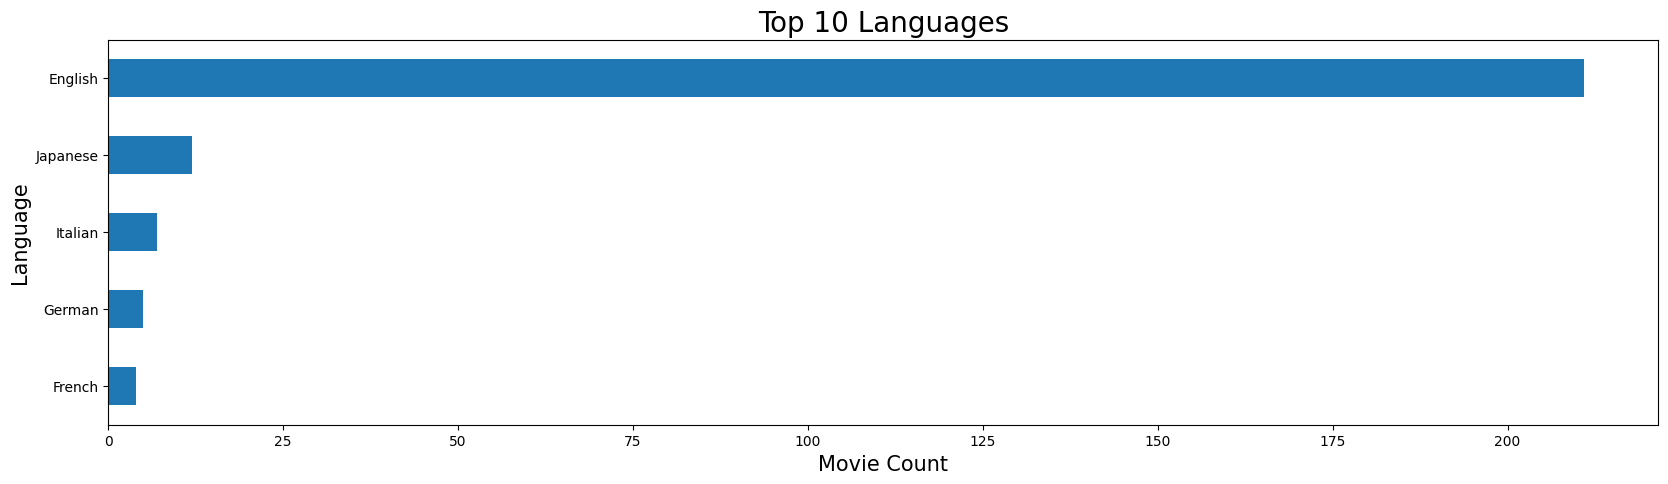

In [50]:
top250movies_score['original_language'].value_counts()[:5].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Languages', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Language', fontsize = 15);

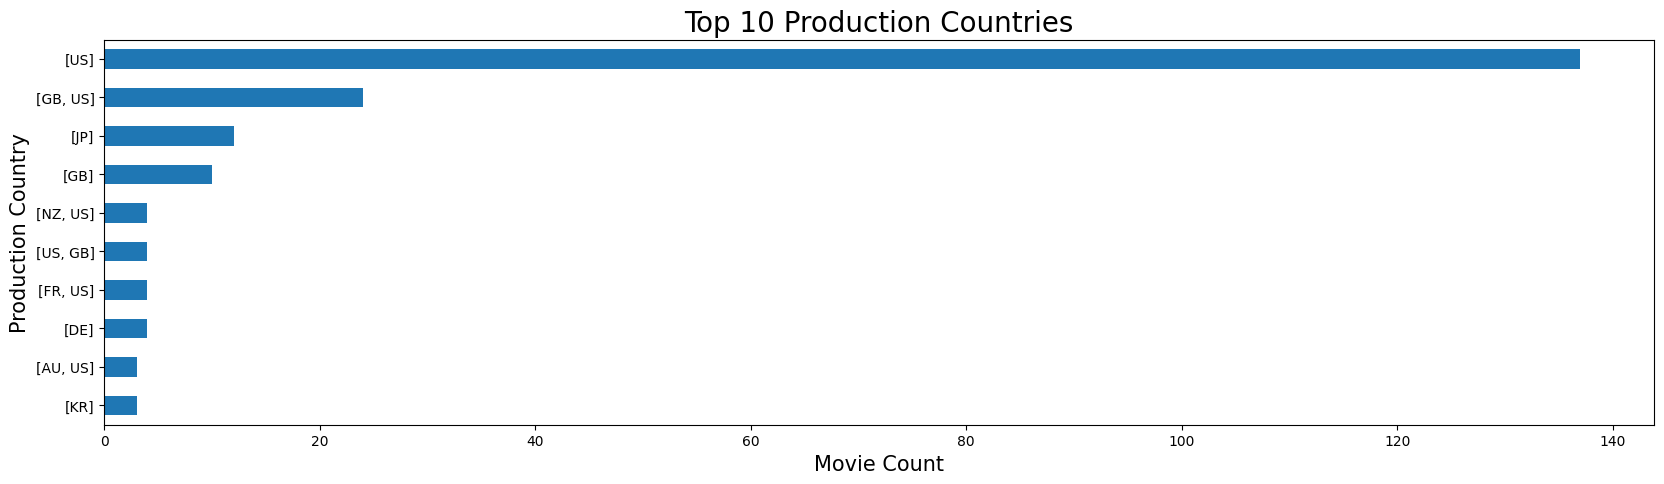

In [51]:
top250movies_score['production_countries'].value_counts()[:10].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Production Countries', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Production Country', fontsize = 15);

In [52]:
#split the column “production_countries” into multiple columns, one for each value in the list using tolist() function
production_countries = pd.DataFrame(top250movies_score['production_countries'].tolist(), columns = ['country1', 'country2', 'country3'])
production_countries

,country1,country2,country3
0,US,None,None
1,US,None,None
2,US,None,None
3,US,None,None
4,GB,US,None
...,...,...,...
245,BE,DK,FR
246,US,None,None
247,SE,None,None
248,US,None,None


In [53]:
# replace 'NaN' values with empty string
production_countries['country1'] = production_countries['country1'].fillna('')
production_countries['country2'] = production_countries['country2'].fillna('')
production_countries['country3'] = production_countries['country3'].fillna('')


# combine the three columns into one column (production_countries) with a separator
production_countries['countries'] = production_countries['country1'] + production_countries['country2'] + production_countries['country3']

In [54]:
# combine the three columns into one column (production_countries) with a separator
production_countries['countries'] = production_countries['country1'].str.cat(production_countries[['country2', 'country3']], sep=' - ')

In [55]:
production_countries.head(20)

,country1,country2,country3,countries
0,US,,,US - -
1,US,,,US - -
2,US,,,US - -
3,US,,,US - -
4,GB,US,,GB - US -
5,US,HK,GB,US - HK - GB
6,US,,,US - -
7,US,,,US - -
8,DE,US,,DE - US -
9,US,,,US - -


In [56]:
production_countries.loc[production_countries['countries'] == 'GB - US - ', 'countries'] = 'US - GB - '


In [57]:
production_countries[production_countries['countries'] == 'GB - US - ']

,country1,country2,country3,countries


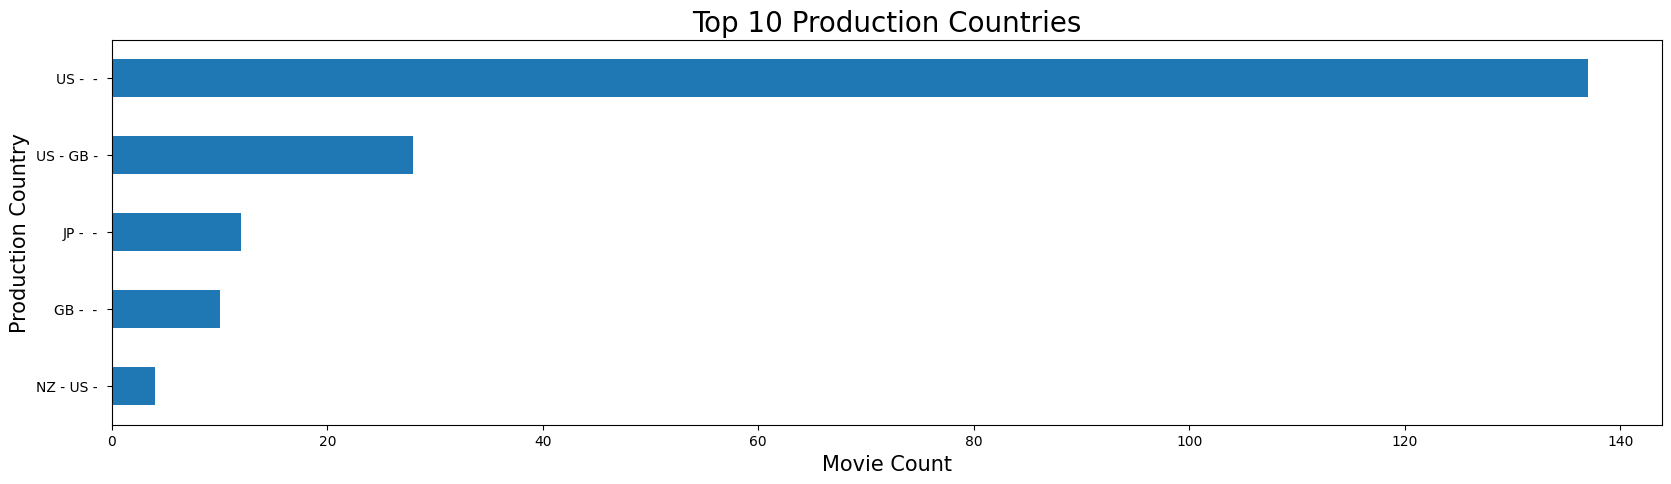

In [58]:
production_countries['countries'].value_counts()[:5].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Production Countries', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Production Country', fontsize = 15);

In [59]:
production_countries.loc[production_countries['countries'] == 'US - - ', 'countries'] = 'US'
production_countries.loc[production_countries['countries'] == 'US - GB - ', 'countries'] = 'US-GB'
production_countries.loc[production_countries['countries'] == 'JP - - ', 'countries'] = 'JP'
production_countries.loc[production_countries['countries'] == 'GB - - ', 'countries'] = 'GB'
production_countries.loc[production_countries['countries'] == 'FR - US - ', 'countries'] = 'FR-US'
production_countries.loc[production_countries['countries'] == 'DE - - ', 'countries'] = 'DE'
production_countries.loc[production_countries['countries'] == 'NZ - US - ', 'countries'] = 'NZ-US'
production_countries.loc[production_countries['countries'] == 'KR - - ', 'countries'] = 'KR'
production_countries.loc[production_countries['countries'] == 'IT - - ', 'countries'] = 'IT'
production_countries.loc[production_countries['countries'] == 'AU - US - ', 'countries'] = 'AU-US'


In [60]:
production_countries.sample(20)

,country1,country2,country3,countries
32,GB,,,GB - -
89,US,,,US - -
64,US,,,US - -
43,US,,,US - -
177,US,,,US - -
159,US,,,US - -
120,JP,,,JP - -
164,CN,US,,CN - US -
93,US,,,US - -
130,US,,,US - -


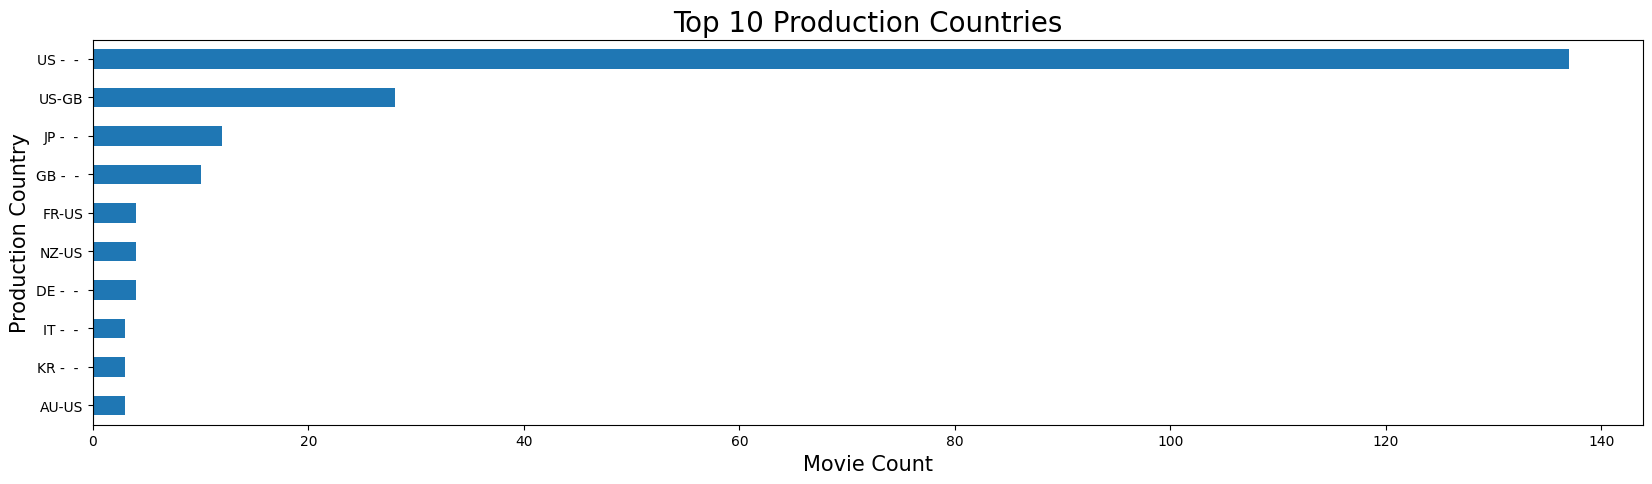

In [61]:
production_countries['countries'].value_counts()[:10].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Production Countries', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Production Country', fontsize = 15);

In [62]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        45466 non-null  object 
 1   overview              44512 non-null  object 
 2   revenue               45460 non-null  float64
 3   budget                45466 non-null  object 
 4   genres                45466 non-null  object 
 5   original_language     45455 non-null  object 
 6   popularity            45461 non-null  object 
 7   vote_average          45460 non-null  float64
 8   vote_count            45460 non-null  float64
 9   production_countries  45463 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.5+ MB


In [63]:
#Using Apply to search for substring in all dataframe columns
substring = 'jpg'
df_movies[df_movies.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries
19730,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...",104.0,NaN,NaN,NaN,6.0
29503,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...",68.0,NaN,NaN,NaN,7.0
35587,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...",82.0,Beware Of Frost Bites,NaN,NaN,4.3


In [64]:
#replace string values under budget column to Nan
df_movies['budget'] = df_movies['budget'].replace('/ff9qCepilowshEtG2GYWwzt2bs4.jpg', np.nan)
df_movies['budget'] = df_movies['budget'].replace('/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg', np.nan)
df_movies['budget'] = df_movies['budget'].replace('/zaSf5OG7V8X8gqFvly88zDdRm46.jpg', np.nan)

/tmp/ipykernel_32834/2853956430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['budget'] = df_movies['budget'].replace('/ff9qCepilowshEtG2GYWwzt2bs4.jpg', np.nan)
/tmp/ipykernel_32834/2853956430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['budget'] = df_movies['budget'].replace('/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg', np.nan)
/tmp/ipykernel_32834/2853956430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [65]:
#Using Apply to search for substring in all dataframe columns
substring = 'jpg'
df_movies[df_movies.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]

,original_title,overview,revenue,budget,genres,original_language,popularity,vote_average,vote_count,production_countries


In [66]:
# change data type of budget column from string to float
df_movies['budget'] = df_movies['budget'].astype(float)

/tmp/ipykernel_32834/2245891682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['budget'] = df_movies['budget'].astype(float)


In [67]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        45466 non-null  object 
 1   overview              44512 non-null  object 
 2   revenue               45460 non-null  float64
 3   budget                45463 non-null  float64
 4   genres                45466 non-null  object 
 5   original_language     45455 non-null  object 
 6   popularity            45461 non-null  object 
 7   vote_average          45460 non-null  float64
 8   vote_count            45460 non-null  float64
 9   production_countries  45463 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.5+ MB


In [68]:
#Create a new column 'estimated profit' to store the estimazed profit of movies computed by subtracting
#the values in the budget column from the values in the revenue column and set the new column next to buget column
df_movies.insert(4, 'estimated_profit', df_movies['revenue'] - df_movies['budget'])
df_movies.head()

,original_title,overview,revenue,budget,estimated_profit,genres,original_language,popularity,vote_average,vote_count,production_countries
0,Toy Story,"Led by Woody, Andy's toys live happily in his ...",373554033.0,30000000.0,343554033.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,21.946943,7.7,5415.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1,Jumanji,When siblings Judy and Peter discover an encha...,262797249.0,65000000.0,197797249.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,17.015539,6.9,2413.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
2,Grumpier Old Men,A family wedding reignites the ancient feud be...,0.0,0.0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",en,11.7129,6.5,92.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",81452156.0,16000000.0,65452156.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,3.859495,6.1,34.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...,76578911.0,0.0,76578911.0,"[{'id': 35, 'name': 'Comedy'}]",en,8.387519,5.7,173.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."


In [69]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        45466 non-null  object 
 1   overview              44512 non-null  object 
 2   revenue               45460 non-null  float64
 3   budget                45463 non-null  float64
 4   estimated_profit      45460 non-null  float64
 5   genres                45466 non-null  object 
 6   original_language     45455 non-null  object 
 7   popularity            45461 non-null  object 
 8   vote_average          45460 non-null  float64
 9   vote_count            45460 non-null  float64
 10  production_countries  45463 non-null  object 
dtypes: float64(5), object(6)
memory usage: 3.8+ MB


In [70]:
df_movies_sorted = df_movies.sort_values(by=['estimated_profit'], ascending=False)
df_movies_sorted.head(20)

,original_title,overview,revenue,budget,estimated_profit,genres,original_language,popularity,vote_average,vote_count,production_countries
14551,Avatar,"In the 22nd century, a paraplegic Marine is di...",2.787965e+09,237000000.0,2.550965e+09,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,185.070892,7.2,12114.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
26555,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,2.068224e+09,245000000.0,1.823224e+09,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,31.626013,7.5,7993.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
1639,Titanic,"84 years later, a 101-year-old woman named Ros...",1.845034e+09,200000000.0,1.645034e+09,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",en,26.88907,7.5,7770.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
25084,Jurassic World,Twenty-two years after the events of Jurassic ...,1.513529e+09,150000000.0,1.363529e+09,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,32.790475,6.5,8842.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
28830,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,1.506249e+09,190000000.0,1.316249e+09,"[{'id': 28, 'name': 'Action'}]",en,27.275687,7.3,4253.0,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_..."
17818,The Avengers,When an unexpected enemy emerges and threatens...,1.519558e+09,220000000.0,1.299558e+09,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",en,89.887648,7.4,12000.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
17437,Harry Potter and the Deathly Hallows: Part 2,"Harry, Ron and Hermione continue their quest t...",1.342000e+09,125000000.0,1.217000e+09,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,24.990737,7.9,6141.0,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'..."
26558,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,1.405404e+09,280000000.0,1.125404e+09,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,37.37942,7.3,6908.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
22110,Frozen,Young princess Anna of Arendelle dreams about ...,1.274219e+09,150000000.0,1.124219e+09,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",en,24.248243,7.3,5440.0,"[{'iso_3166_1': 'US', 'name': 'United States o..."
42222,Beauty and the Beast,A live-action adaptation of Disney's version o...,1.262886e+09,160000000.0,1.102886e+09,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",en,287.253654,6.8,5530.0,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'..."


In [71]:
top250movies_profit = df_movies_sorted[['original_title', 'genres', 'popularity', 'original_language', 
                                        'production_countries', 'revenue', 'budget', 'estimated_profit']].head(250)
top250movies_profit.head()

,original_title,genres,popularity,original_language,production_countries,revenue,budget,estimated_profit
14551,Avatar,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",185.070892,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",2.787965e+09,237000000.0,2.550965e+09
26555,Star Wars: The Force Awakens,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",31.626013,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",2.068224e+09,245000000.0,1.823224e+09
1639,Titanic,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",26.88907,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.845034e+09,200000000.0,1.645034e+09
25084,Jurassic World,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",32.790475,en,"[{'iso_3166_1': 'US', 'name': 'United States o...",1.513529e+09,150000000.0,1.363529e+09
28830,Furious 7,"[{'id': 28, 'name': 'Action'}]",27.275687,en,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1.506249e+09,190000000.0,1.316249e+09


In [72]:
top250movies_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 14551 to 2006
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        250 non-null    object 
 1   genres                250 non-null    object 
 2   popularity            250 non-null    object 
 3   original_language     250 non-null    object 
 4   production_countries  250 non-null    object 
 5   revenue               250 non-null    float64
 6   budget                250 non-null    float64
 7   estimated_profit      250 non-null    float64
dtypes: float64(3), object(5)
memory usage: 17.6+ KB


In [73]:
top250movies_profit.describe()

,revenue,budget,estimated_profit
count,2.500000e+02,2.500000e+02,2.500000e+02
mean,6.777880e+08,1.184535e+08,5.593345e+08
std,3.035510e+08,7.239554e+07,2.678445e+08
min,3.180001e+08,0.000000e+00,3.050000e+08
25%,4.707962e+08,6.079000e+07,3.762153e+08
50%,6.069794e+08,1.175000e+08,4.853064e+08
75%,8.067463e+08,1.687500e+08,6.607069e+08
max,2.787965e+09,3.800000e+08,2.550965e+09


In [74]:
top250movies_profit['estimated_profit'].describe().apply(lambda x: format(x, 'f'))

count           250.000000
mean      559334473.096000
std       267844469.537323
min       305000000.000000
25%       376215349.750000
50%       485306433.000000
75%       660706865.500000
max      2550965087.000000
Name: estimated_profit, dtype: object

In [75]:
top250movies_profit['popularity'] = top250movies_profit['popularity'].astype(float)
top250movies_profit['popularity'].describe()

count    250.000000
mean      30.204924
std       50.084681
min        0.702543
25%       13.876591
50%       19.083534
75%       26.576124
max      547.488298
Name: popularity, dtype: float64

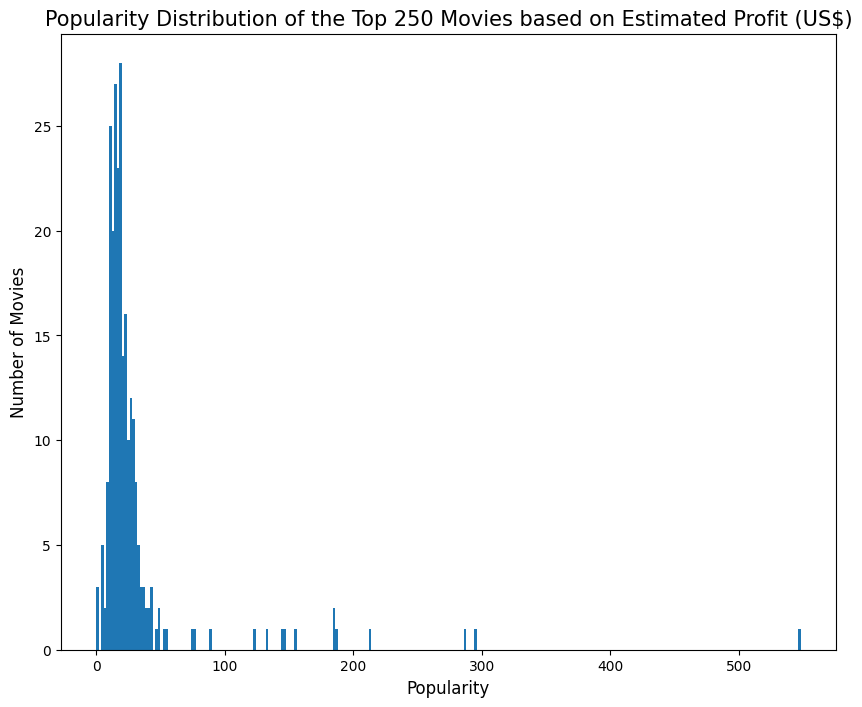

In [76]:
bins = np.arange(0, top250movies_profit['popularity'].max()+0.7, 2)
plt.figure(figsize=[10, 8])
plt.hist(data=top250movies_profit, x = 'popularity', bins = bins);
plt.xlabel('Popularity', size = 12);
plt.ylabel('Number of Movies', size = 12)
plt.title('Popularity Distribution of the Top 250 Movies based on Estimated Profit (US$)', size = 15);

In [77]:
# create function to extract genre and country by converting from json list into list of strings

def json_to_arr(cell, wanted = 'name'):
    cell = literal_eval(cell)
    if cell == [] or (isinstance(cell, float) and cell.isna()):
        return np.nan
    result = []
    counter = 0
    for element in cell:
        if counter < 3:
            result.append(element[wanted])
            counter += 1
        else:
            break
    return result[:3]

In [78]:
top250movies_profit[['genres']] = top250movies_profit[['genres']].applymap(json_to_arr)
top250movies_profit[['production_countries']] = top250movies_profit[['production_countries']].applymap(lambda row:
                                                                                json_to_arr(row, "iso_3166_1"))

/tmp/ipykernel_32834/732717651.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top250movies_profit[['genres']] = top250movies_profit[['genres']].applymap(json_to_arr)
/tmp/ipykernel_32834/732717651.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top250movies_profit[['production_countries']] = top250movies_profit[['production_countries']].applymap(lambda row:


In [79]:
top250movies_profit.to_csv('top250movies_profit.csv', index = False)

In [80]:
top250movies_profit['genres'].value_counts()

genres
[Action, Adventure, Fantasy]            12
[Animation, Comedy, Family]             11
[Action, Adventure, Science Fiction]    10
[Adventure, Action, Science Fiction]     8
[Animation, Family]                      8
                                        ..
[Action, Mystery, Science Fiction]       1
[History, Romance, War]                  1
[Family, Animation, Comedy]              1
[Romance, Drama, Thriller]               1
[Horror, Thriller]                       1
Name: count, Length: 129, dtype: int64

In [81]:
top250movies_profit['production_countries'].value_counts()

production_countries
[US]            176
[GB, US]         27
[NZ, US]          6
[CN, US]          4
[DE, US]          4
[DE, GB, US]      3
[JP, US]          2
[US, GB]          2
[AU, US]          2
[CA, US]          2
[FR]              2
[CZ, US, AE]      1
[CA, US, GB]      1
[CN]              1
[US, MT, FR]      1
[US, TW, GB]      1
[IT, GB, US]      1
[FR, US]          1
[NL, FR, GB]      1
[GB]              1
[CA, HK, TW]      1
[IN, GB, US]      1
[CA, US, AU]      1
[JP]              1
[CN, HK]          1
[NZ, US, DE]      1
[US, MT]          1
[AU, GB, US]      1
[AU]              1
[US, MT, GB]      1
[JP, US, NZ]      1
Name: count, dtype: int64

In [82]:
top250movies_profit.head()

,original_title,genres,popularity,original_language,production_countries,revenue,budget,estimated_profit
14551,Avatar,"[Action, Adventure, Fantasy]",185.070892,en,"[US, GB]",2.787965e+09,237000000.0,2.550965e+09
26555,Star Wars: The Force Awakens,"[Action, Adventure, Science Fiction]",31.626013,en,[US],2.068224e+09,245000000.0,1.823224e+09
1639,Titanic,"[Drama, Romance, Thriller]",26.889070,en,[US],1.845034e+09,200000000.0,1.645034e+09
25084,Jurassic World,"[Action, Adventure, Science Fiction]",32.790475,en,[US],1.513529e+09,150000000.0,1.363529e+09
28830,Furious 7,[Action],27.275687,en,"[JP, US]",1.506249e+09,190000000.0,1.316249e+09


In [83]:
top250movies_profit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 14551 to 2006
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   original_title        250 non-null    object 
 1   genres                250 non-null    object 
 2   popularity            250 non-null    float64
 3   original_language     250 non-null    object 
 4   production_countries  250 non-null    object 
 5   revenue               250 non-null    float64
 6   budget                250 non-null    float64
 7   estimated_profit      250 non-null    float64
dtypes: float64(4), object(4)
memory usage: 17.6+ KB


In [84]:
top250movies_profit['original_language'].unique()

array(['en', 'fr', 'ja', 'zh'], dtype=object)

In [85]:
top250movies_profit.loc[top250movies_profit['original_language'] == 'en', 'original_language'] = 'English'
top250movies_profit.loc[top250movies_profit['original_language'] == 'fr', 'original_language'] = 'French'
top250movies_profit.loc[top250movies_profit['original_language'] == 'ja', 'original_language'] = 'Japanese'
top250movies_profit.loc[top250movies_profit['original_language'] == 'zh', 'original_language'] = 'Chinese(ZH)'
top250movies_profit['original_language'].unique()

array(['English', 'French', 'Japanese', 'Chinese(ZH)'], dtype=object)

In [86]:
top250movies_profit.sample(20)

,original_title,genres,popularity,original_language,production_countries,revenue,budget,estimated_profit
23472,Mission: Impossible - Rogue Nation,"[Action, Adventure, Thriller]",17.836882,English,"[CN, US]",6.823301e+08,150000000.0,532330139.0
10598,King Kong,"[Adventure, Drama, Action]",19.761164,English,"[NZ, US, DE]",5.500000e+08,207000000.0,343000000.0
14416,2012,"[Action, Adventure, Science Fiction]",16.698628,English,"[CA, US]",7.696536e+08,200000000.0,569653595.0
42171,Kong: Skull Island,"[Action, Adventure, Fantasy]",29.429112,English,[US],5.666528e+08,185000000.0,381652812.0
24121,The Maze Runner,"[Action, Mystery, Science Fiction]",76.937890,English,[US],3.483199e+08,34000000.0,314319861.0
33246,Hotel Transylvania 2,"[Animation, Comedy, Family]",11.760218,English,[US],4.732270e+08,80000000.0,393226958.0
43255,The Fate of the Furious,"[Action, Crime, Thriller]",48.573287,English,[US],1.238765e+09,250000000.0,988764765.0
27478,Fifty Shades of Grey,"[Drama, Romance, Thriller]",33.068431,English,[US],5.710061e+08,40000000.0,531006128.0
4833,Ocean's Eleven,"[Thriller, Crime]",12.114932,English,[US],4.507172e+08,85000000.0,365717150.0
29575,San Andreas,"[Action, Drama, Thriller]",20.547925,English,"[CA, US, AU]",4.704908e+08,110000000.0,360490832.0


In [87]:
top250movies_profit['genres'].value_counts()

genres
[Action, Adventure, Fantasy]            12
[Animation, Comedy, Family]             11
[Action, Adventure, Science Fiction]    10
[Adventure, Action, Science Fiction]     8
[Animation, Family]                      8
                                        ..
[Action, Mystery, Science Fiction]       1
[History, Romance, War]                  1
[Family, Animation, Comedy]              1
[Romance, Drama, Thriller]               1
[Horror, Thriller]                       1
Name: count, Length: 129, dtype: int64

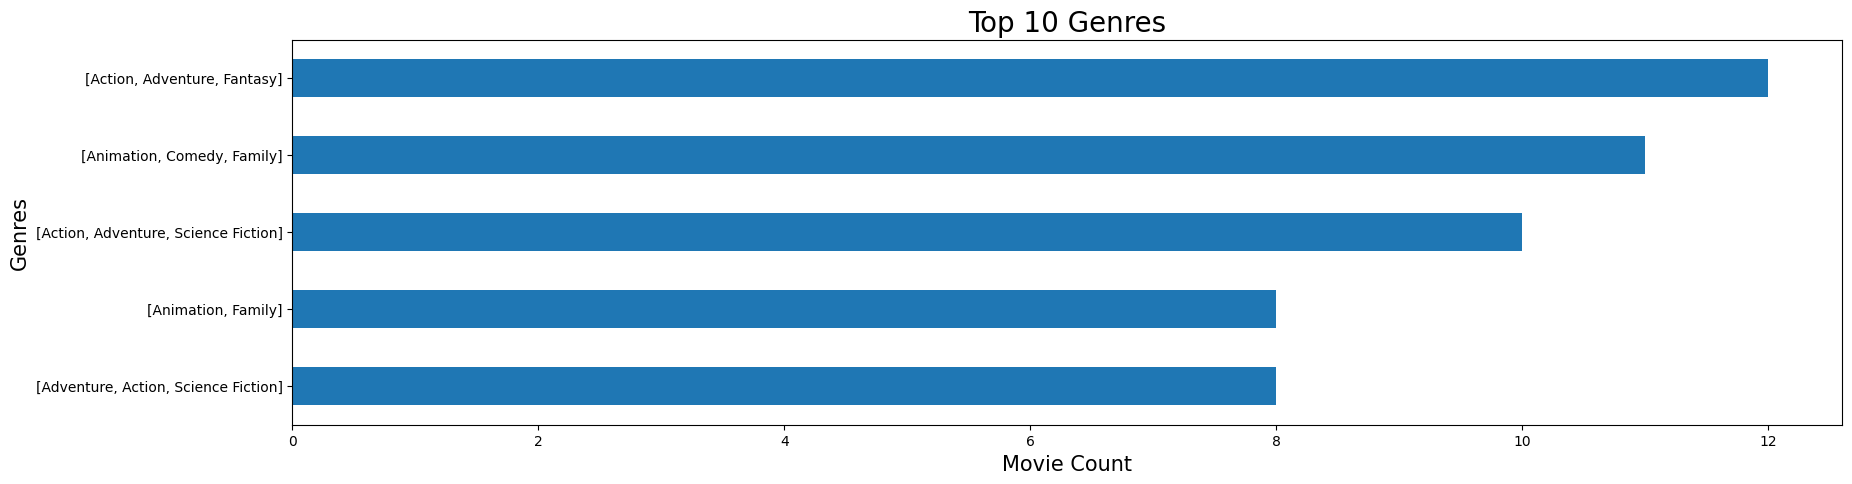

In [88]:
top250movies_profit['genres'].value_counts()[:5].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Genres', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Genres', fontsize = 15);

In [89]:
top250movies_profit.sort_values('popularity', ascending=False, inplace=True)
top10_popular_movies_by_profit = top250movies_profit.head(5)

/tmp/ipykernel_32834/4006833959.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sb.barplot(data = top10_popular_movies_by_profit, x = 'popularity', y = 'original_title', color=base_color, errwidth = 0)


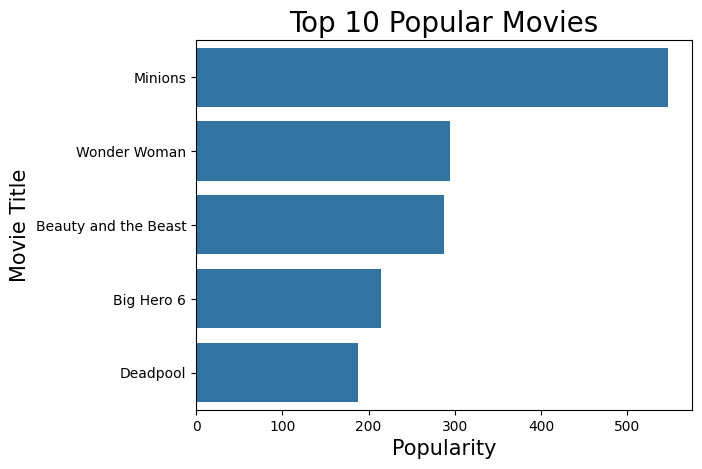

In [90]:
base_color = sb.color_palette()[0]
sb.barplot(data = top10_popular_movies_by_profit, x = 'popularity', y = 'original_title', color=base_color, errwidth = 0)
plt.title('Top 10 Popular Movies', fontsize = 20)
plt.xlabel('Popularity', fontsize = 15);
plt.ylabel('Movie Title', fontsize = 15);

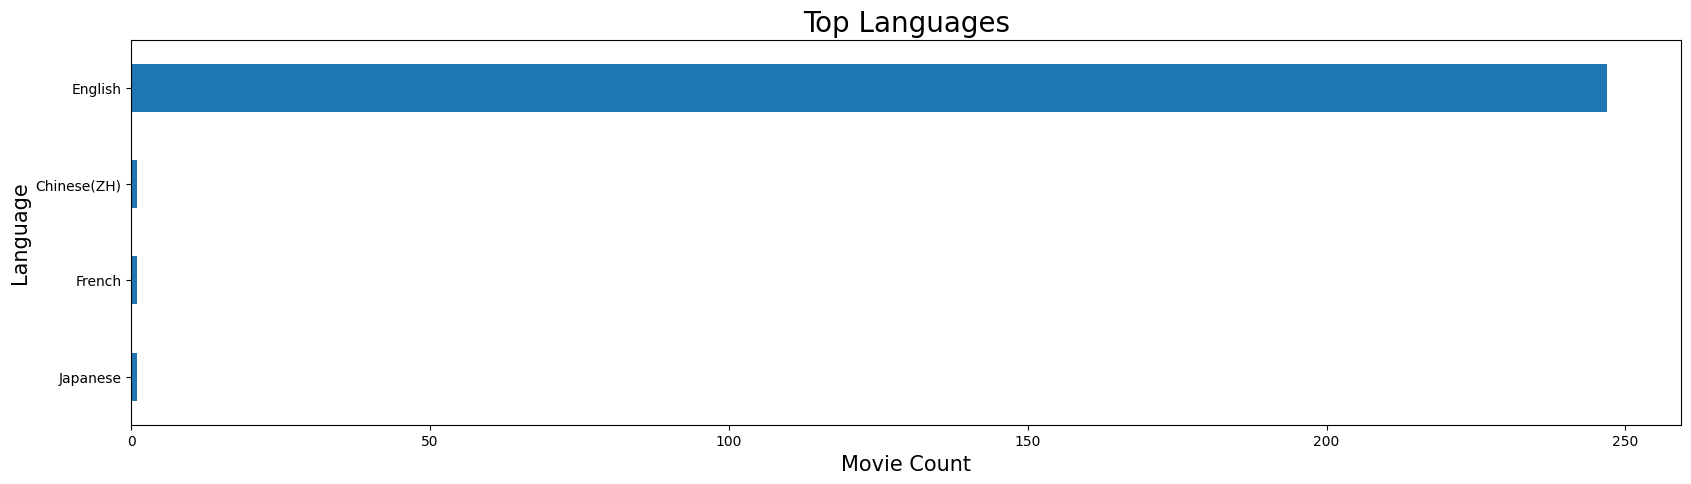

In [91]:
top250movies_profit['original_language'].value_counts()[:10].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top Languages', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Language', fontsize = 15);

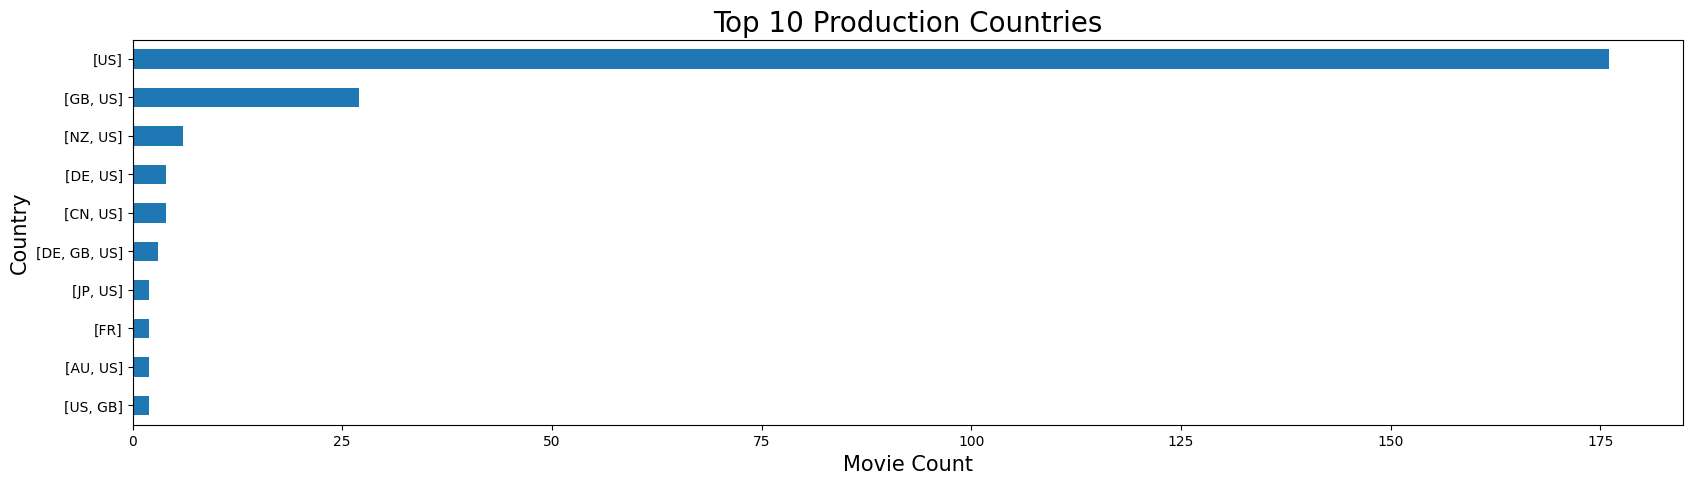

In [92]:
top250movies_profit['production_countries'].value_counts()[:10].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Production Countries', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Country', fontsize = 15);

In [93]:
#split the column “production_countries” into multiple columns, one for each value in the list using tolist() function
top_prod_countries_profit= pd.DataFrame(top250movies_profit['production_countries'].tolist(), columns = ['country1', 'country2', 'country3'])
top_prod_countries_profit

,country1,country2,country3
0,US,None,None
1,US,None,None
2,GB,US,None
3,US,None,None
4,US,None,None
...,...,...,...
245,US,None,None
246,US,None,None
247,US,None,None
248,US,None,None


In [94]:
# replace 'NaN' values with empty string
top_prod_countries_profit['country1'] = top_prod_countries_profit['country1'].fillna('')
top_prod_countries_profit['country2'] = top_prod_countries_profit['country2'].fillna('')
top_prod_countries_profit['country3'] = top_prod_countries_profit['country3'].fillna('')
top_prod_countries_profit

,country1,country2,country3
0,US,,
1,US,,
2,GB,US,
3,US,,
4,US,,
...,...,...,...
245,US,,
246,US,,
247,US,,
248,US,,


In [95]:
# combine the three columns into one column (production_countries) with a separator
top_prod_countries_profit['countries'] = top_prod_countries_profit['country1'].str.cat(top_prod_countries_profit[['country2', 'country3']], sep='-')
top_prod_countries_profit.head(20)

,country1,country2,country3,countries
0,US,,,US--
1,US,,,US--
2,GB,US,,GB-US-
3,US,,,US--
4,US,,,US--
5,US,,,US--
6,US,GB,,US-GB-
7,US,,,US--
8,US,,,US--
9,US,,,US--


In [96]:
top_prod_countries_profit.loc[top_prod_countries_profit['countries'] == 'GB-US-', 'countries'] = 'US-GB-'
top_prod_countries_profit[top_prod_countries_profit['countries'] == 'GB-US-']

,country1,country2,country3,countries


In [97]:
top_prod_countries_profit[top_prod_countries_profit['countries'] == 'US-GB-']

,country1,country2,country3,countries
2,GB,US,,US-GB-
6,US,GB,,US-GB-
11,GB,US,,US-GB-
16,GB,US,,US-GB-
24,GB,US,,US-GB-
26,GB,US,,US-GB-
53,GB,US,,US-GB-
55,GB,US,,US-GB-
56,GB,US,,US-GB-
67,GB,US,,US-GB-


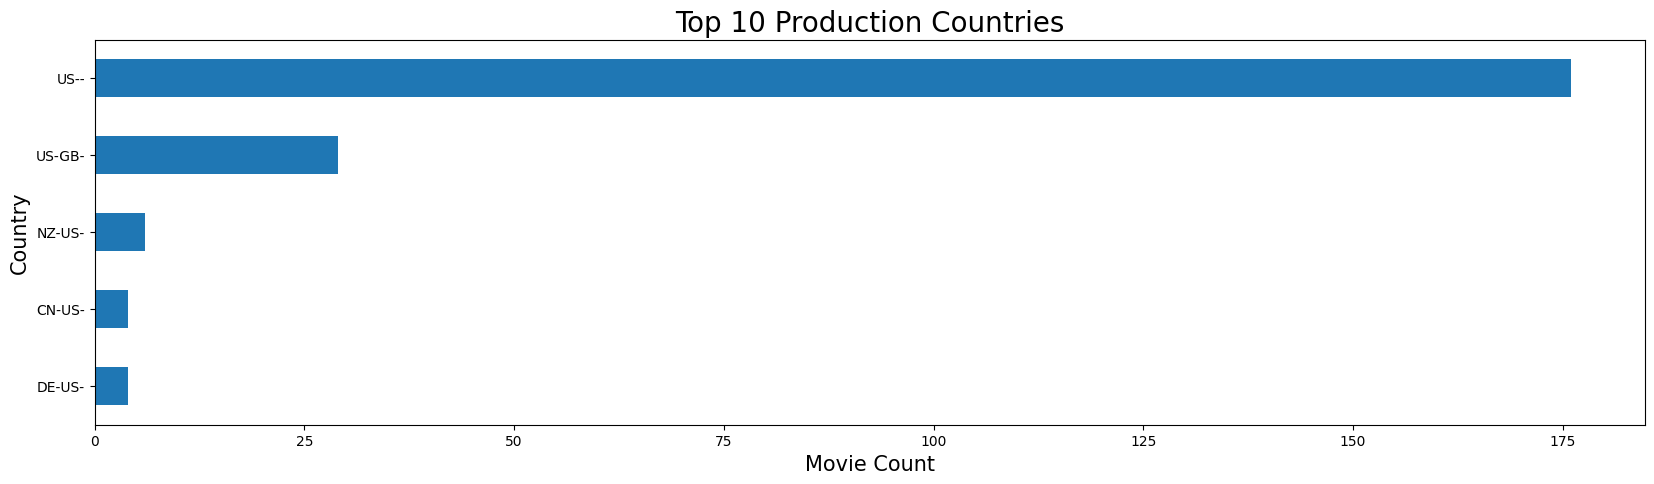

In [98]:
top_prod_countries_profit['countries'].value_counts()[:5].sort_values().plot(kind = 'barh', figsize = (20,5))
plt.title('Top 10 Production Countries', fontsize = 20)
plt.xlabel('Movie Count', fontsize = 15)
plt.ylabel('Country', fontsize = 15);